In [1]:
import os
import glob

file_location = os.path.join('*.pdb') #you can create your file_location with this, in this case it is not that needed
file_names = glob.glob(file_location) #file names are extracted


print(file_names[0:1])

['ZBTB10_ZBTB11_9bce7_unrelaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb']


In [2]:
#In this cell, monomers are read from the monomers/ directory
import os
import glob

file_location = os.path.join('monomers') #directory name is stored
file_names_monomers = glob.glob('monomers/*.pdb') #pdb file names are stored

print(file_names_monomers[0:5])

['monomers\\ZBTB10_aa958_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb', 'monomers\\ZBTB11_0f367_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb', 'monomers\\ZBTB12_2ca84_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb', 'monomers\\ZBTB14_28b58_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb', 'monomers\\ZBTB16_a2673_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb']


In [3]:
#In this cell, HOMOdimers are read from the homodimers/ directory
import os
import glob

file_location = os.path.join('homodimers') #directory name is stored
file_names_homodimers = glob.glob('homodimers/*.pdb') #pdb file names are stored

print(file_names_homodimers[0:5])

['homodimers\\ZBTB10_ZBTB10_277d5_unrelaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000.pdb', 'homodimers\\ZBTB11_ZBTB11_ae58d_unrelaxed_rank_001_alphafold2_multimer_v3_model_1_seed_000.pdb', 'homodimers\\ZBTB12_ZBTB12_8367f_unrelaxed_rank_001_alphafold2_multimer_v3_model_2_seed_000.pdb', 'homodimers\\ZBTB14_ZBTB14_142c6_unrelaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000.pdb', 'homodimers\\ZBTB16_ZBTB16_07e2a_unrelaxed_rank_001_alphafold2_multimer_v3_model_2_seed_000.pdb']


In [4]:
import pandas as pd 
import re

#file_names dataframe is created, this will store dimer pdb file names...
#...the first & second monomer names in separate columns
file_names_df = pd.DataFrame(columns= ['File_Name','First_Name','Second_Name'])
i=0

for f in file_names:
    match = re.search(r'ZBTB.{1,2}_ZBTB.{1,2}_',f)#get the names only
    if match: #should always work 
        match_mono_first = re.search(r'ZBTB.{1,2}_', match.group()) #get the first name
        match_mono_second = re.search(r'_ZBTB.{1,2}', match.group()) #get the second name
    else: #if it doesn't work raise error
        raise TypeError("Match is not found.")
        break
    #put them to file_names_df
    file_names_df.loc[i] = (f, match_mono_first.group().replace("_",""), match_mono_second.group().replace("_",""))
    i = i+1

#now the corresponding monomer file names for each chain of dimers (first and second) will be added to the dataframe
file_names_df["First_Monomer_File_Name"]=""
file_names_df["Second_Monomer_File_Name"]=""

#In this nested loop, monomer file names will be found
for i in file_names_df.index:
    for f_mono in file_names_monomers: #this is the file names from monomer directory
        match = re.search(r'ZBTB.{1,2}_',f_mono)#extracting this part from monomer file names
        if match:
            if str(file_names_df.iloc[i][1]+"_") == match.group(): #if monomer name matches with the first name of the dimer
                first_monomer = str(f_mono)
            if str(file_names_df.iloc[i][2]+"_") == match.group(): #if monomer name matches with the second name of the dimer
                second_monomer = str(f_mono)
        else: #if it doesn't work raise error
            raise TypeError("Match is not found.")
            break
    file_names_df.iloc[i,3] = first_monomer
    file_names_df.iloc[i,4] = second_monomer
    
#now the corresponding HOMOdimer file names for each chain of dimers (first and second) will be added to the dataframe
file_names_df["First_Homodimer_File_Name"]=""
file_names_df["Second_Homodimer_File_Name"]=""

#In this nested loop, HOMOdimer file names will be found
for i in file_names_df.index:
    for f_homo in file_names_homodimers: #this is the file names from monomer directory
        match = re.search(r'ZBTB.{1,2}_',f_homo)#extracting this part from monomer file names
        if match:
            if str(file_names_df.iloc[i][1]+"_") == match.group(): #if monomer name matches with the first name of the dimer
                first_homodimer = str(f_homo)
            if str(file_names_df.iloc[i][2]+"_") == match.group(): #if monomer name matches with the second name of the dimer
                second_homodimer = str(f_homo)
        else: #if it doesn't work raise error
            raise TypeError("Match is not found.")
            break
    file_names_df.iloc[i,5] = first_homodimer
    file_names_df.iloc[i,6] = second_homodimer


display(file_names_df.tail(2))
#file_names_df.to_csv('figures_csv/file_names_df.csv',index=False) #file_names_df is saved
#file_names_df.to_excel('figures_csv/file_names_df.xlsx',index=False) #file_names_df is saved

,File_Name,First_Name,Second_Name,First_Monomer_File_Name,Second_Monomer_File_Name,First_Homodimer_File_Name,Second_Homodimer_File_Name
1112,ZBTB9_ZBTB48_135d9_unrelaxed_rank_001_alphafol...,ZBTB9,ZBTB48,monomers\ZBTB9_228f4_unrelaxed_rank_001_alphaf...,monomers\ZBTB48_f8ca3_unrelaxed_rank_001_alpha...,homodimers\ZBTB9_ZBTB9_dc311_unrelaxed_rank_00...,homodimers\ZBTB48_ZBTB48_5a6dd_unrelaxed_rank_...
1113,ZBTB9_ZBTB49_81f14_unrelaxed_rank_001_alphafol...,ZBTB9,ZBTB49,monomers\ZBTB9_228f4_unrelaxed_rank_001_alphaf...,monomers\ZBTB49_0e193_unrelaxed_rank_001_alpha...,homodimers\ZBTB9_ZBTB9_dc311_unrelaxed_rank_00...,homodimers\ZBTB49_ZBTB49_068ec_unrelaxed_rank_...


In [5]:
import prody
#this function takes a file name (a pdb file name) and outputs 2 chains as pdb files and returns chain A name chain B names 
def separate_chains(f):
    chain_A = prody.parsePDB(f,chain="A")
    chain_B = prody.parsePDB(f,chain="B")
    
    chain_A_name = 'chain_A_of_' + f
    chain_B_name = 'chain_B_of_' + f
    
    #from prody A and B chains are separated (AlphaFold now names them as A and B!)
    prody.writePDB(chain_A_name, chain_A)
    prody.writePDB(chain_B_name, chain_B)
    
    return chain_A_name, chain_B_name


In [6]:
import freesasa

def get_structure_dict(file_name):
    
    #freesasa gets the structure and after freesasa.calc function it returns a freesasa.Result object 
    structure = freesasa.Structure(file_name)
    result = freesasa.calc(structure) #this is the freesasa.Result object

    result_no_atoms = result.nAtoms() #this returns no of atoms in the result, int
    #if you can print
    
    total_area = result.totalArea() #Total SASA of the structure, you can also get  this
    
    result_dict = result.residueAreas()#this gets SASA for all residues, returns a freesasa.ResidueArea object
    #to reach a specific residue = result_dict["A"]["5"], A is for chain, the other number is for residue!
    
    return result_dict


In [7]:
def sasa_scoring(result_dict):
    
    #this function returns two lists & the total chain length, for each chain, SASA scores for each residue 
    #(they are from residue 1 to the end residue!)
    list_for_A = []
    list_for_B = []
    
    for i in range (1,10000):
        try:
            list_for_A.append(result_dict["A"][str(i)].total)
        except:
            break
    
    for i in range (1,10000):
        try:
            list_for_B.append(result_dict["B"][str(i)].total)
        except:
            break
            
    
    return(list_for_A,list_for_B)

In [8]:
def interaction_site(list_for_A,list_for_A_from_A):
    #now let's try to find the interaction site!!
    final_list_A = []
    a_chain_length = 0

    for i in range (0, len(list_for_A)):
        final_list_A.append(list_for_A_from_A[i] - list_for_A[i])
        a_chain_length = a_chain_length + 1 
    
    interaction_area_A = sum(final_list_A)

    #we have to pick a treshold for this!
    #!!!!! THRESHOLD IS PICKED AS 20, THIS CAN BE CHANGED !!!!!!
    interaction_sites_for_A = []
    for i in range (0, len(final_list_A)):
        if(final_list_A[i] > 20):
            interaction_sites_for_A.append(i+1)
    
    return (interaction_sites_for_A,interaction_area_A,a_chain_length)

In [9]:
#This was adopted from pDockq paper!!
#This only gathers chain coordinates and chain pLDDTs!

import sys
import numpy as np
import pandas as pd
from collections import defaultdict
import pdb


#####################FUNCTIONS#########################
def parse_atm_record(line):
    '''Get the atm record
    '''
    record = defaultdict()
    record['name'] = line[0:6].strip()
    record['atm_no'] = int(line[6:11])
    record['atm_name'] = line[12:16].strip()
    record['atm_alt'] = line[17]
    record['res_name'] = line[17:20].strip()
    record['chain'] = line[21]
    record['res_no'] = int(line[22:26])
    record['insert'] = line[26].strip()
    record['resid'] = line[22:29]
    record['x'] = float(line[30:38])
    record['y'] = float(line[38:46])
    record['z'] = float(line[46:54])
    record['occ'] = float(line[54:60])
    record['B'] = float(line[60:66])

    return record

def read_pdb(pdbfile):
    '''Read a pdb file predicted with AF and rewritten to conatin all chains
    '''

    chain_coords, chain_plddt = {}, {}
    with open(pdbfile, 'r') as file:
        for line in file:
            if not line.startswith('ATOM'):
                continue
            record = parse_atm_record(line)
            #Get CB - CA for GLY
            if record['atm_name']=='CB' or (record['atm_name']=='CA' and record['res_name']=='GLY'):
                if record['chain'] in [*chain_coords.keys()]:
                    chain_coords[record['chain']].append([record['x'],record['y'],record['z']])
                    chain_plddt[record['chain']].append(record['B'])
                else:
                    chain_coords[record['chain']] = [[record['x'],record['y'],record['z']]]
                    chain_plddt[record['chain']] = [record['B']]

    #Convert to arrays
    for chain in chain_coords:
        chain_coords[chain] = np.array(chain_coords[chain])
        chain_plddt[chain] = np.array(chain_plddt[chain])
    
    return chain_plddt


In [10]:
#This function returns average if_plddt score
def if_plddt(chain_plddt, string, interaction_sites):
    interaction_array = np.array(interaction_sites)
    interaction_array = interaction_array - 1 
    if_plddt_score = np.average(chain_plddt[string][interaction_array])
    return if_plddt_score

In [11]:
import json

def pae_value_generator(file_name,interaction_sites_for_A,interaction_sites_for_B,a_chain_length):
    
    #to find the corresponding json_file_name 
    json_file_name = file_name
    json_file_name = json_file_name.replace("unrelaxed","scores")
    json_file_name = json_file_name.replace(".pdb",".json")
    j = open(json_file_name)
    json_file = json.load(j) #a dictionary file is readed
    
    #pae_values is now the 'values' of the 'pae key', it is a 2D List that goes total_chain_length X total_chain_length
    #pae_values[i][j] in here means that PAE(x,y) --> for every i there is a PAE value comparing the every other (+ itself) 
    pae_values = json_file['pae']
    
    pae_score_total_A_length=0 
    pae_score_total_A = 0
    for interaction_site_for_A in interaction_sites_for_A:
        for interaction_site_for_A_compare in interaction_sites_for_A:
            pae_score_total_A = pae_score_total_A + pae_values[interaction_site_for_A-1][interaction_site_for_A_compare-1]
            pae_score_total_A_length = pae_score_total_A_length + 1 
            
    #update the interaction sites! 
    
    def update_list(the_list,chain_length):
        a_list = the_list.copy()
        for i in range(len(a_list)):
            a_list[i] = a_list[i] + chain_length
        return a_list 
    
    if (interaction_sites_for_B != []):
        interaction_sites_for_B_mod = update_list(interaction_sites_for_B,a_chain_length)

        #interaction site combinations (x,y) from interaction_sites_B
        pae_score_total_B_length=0 #how many interaction combinations will be done, it should be stored
        pae_score_total_B = 0 #storing the total pae scoring for B
        for interaction_site_for_B in interaction_sites_for_B_mod:
            for interaction_site_for_B_compare in interaction_sites_for_B_mod:
                pae_score_total_B = pae_score_total_B + pae_values[interaction_site_for_B-1][interaction_site_for_B_compare-1]
                pae_score_total_B_length = pae_score_total_B_length + 1 
    
    else:
        pae_score_total_B_length=0
        pae_score_total_B = 0
        interaction_sites_for_B_mod = []

    return (zero_div(pae_score_total_A,pae_score_total_A_length),zero_div(pae_score_total_B,pae_score_total_B_length),interaction_sites_for_B_mod) 

#when calculating the monomer PAE value, 0 value should be returned for one of the PAE scores
def zero_div(x, y):
    if y: return x / y
    else: return 0

In [ ]:
import pandas as pd

i = 0
interaction_scorings_df = pd.DataFrame(columns= ['Name','interaction_area_A','interaction_area_B','interaction_area','interaction_sites_for_first_chain','interaction_sites_for_second_chain','PAE_for_A','PAE_for_B','PAE_for_A_monomer','PAE_for_B_monomer','Log_PAE_comparison','plDDT_for_A','plDDT_for_B','plDDT_for_A_monomer','plDDT_for_B_monomer','log_plDDT_comparison','log_PAE_comparison_homodimers','log_plDDT_comparison_homodimers','log_PAE_comparison_homodimer_from_A','log_PAE_comparison_homodimer_from_B','log_PAE_comparison_monomer_from_A','log_PAE_comparison_monomer_from_B'])
for i in file_names_df.index:
    
    chain_A_name, chain_B_name = separate_chains(file_names_df.loc[i,"File_Name"])#chains are separated and stored
    
    result_dict= get_structure_dict(file_names_df.loc[i,"File_Name"])#the dimer structure is opened as freesasa result 
    result_dict_A = get_structure_dict(chain_A_name) #now the chains
    result_dict_B = get_structure_dict(chain_B_name)
   
    list_for_A,list_for_B = sasa_scoring(result_dict) #sasa scores for every residue of dimer structure is calculated
    list_for_A_from_A, y = sasa_scoring(result_dict_A) #same for singular chains
    x, list_for_B_from_B = sasa_scoring(result_dict_B) 
    
    #interaction_sites are found (also areas and the chain lengths which will be useful in json iteration)
    interaction_sites_for_A,interaction_area_A,a_chain_length = interaction_site(list_for_A,list_for_A_from_A)
    interaction_sites_for_B,interaction_area_B,b_chain_length = interaction_site(list_for_B,list_for_B_from_B)
    
    #interaction interface pLDDT scores
    chain_plddt = read_pdb(file_names_df.loc[i,"File_Name"])
    plddt_A = if_plddt(chain_plddt, 'A', interaction_sites_for_A)
    plddt_B = if_plddt(chain_plddt, 'B', interaction_sites_for_B)
    plddt_avg = (plddt_A + plddt_B) /2
    
    #interaction interface plDDT scores for monomer structures
    chain_plddt_A_monomer = read_pdb(file_names_df.loc[i,"First_Monomer_File_Name"])
    plddt_A_monomer = if_plddt(chain_plddt_A_monomer,'A',interaction_sites_for_A)
    
    chain_plddt_B_monomer = read_pdb(file_names_df.loc[i,"Second_Monomer_File_Name"])
    plddt_B_monomer = if_plddt(chain_plddt_B_monomer,'A',interaction_sites_for_B)
    
    #interaction interface plDDT scores for HOMOdimer structures
    chain_plddt_A_homodimer = read_pdb(file_names_df.loc[i,"First_Homodimer_File_Name"])
    plddt_A_homodimer = if_plddt(chain_plddt_A_homodimer,'A',interaction_sites_for_A)
    
    chain_plddt_B_homodimer = read_pdb(file_names_df.loc[i,"Second_Homodimer_File_Name"])
    plddt_B_homodimer = if_plddt(chain_plddt_B_homodimer,'A',interaction_sites_for_B)

    #total interaction_area
    interaction_area = interaction_area_A + interaction_area_B 
    
    #interaction interface PAE scores
    score_for_A,score_for_B, interaction_sites_for_B_mod = pae_value_generator(file_names_df.loc[i,"File_Name"], interaction_sites_for_A,interaction_sites_for_B,a_chain_length)
    average_score = (score_for_A + score_for_B )/2
    
    #interaction interface PAE scores for monomers
    empty_list = []
    score_for_A_monomer, y,z = pae_value_generator(file_names_df.loc[i,"First_Monomer_File_Name"],interaction_sites_for_A, empty_list, 0) 
    score_for_B_monomer, y,z = pae_value_generator(file_names_df.loc[i,"Second_Monomer_File_Name"],interaction_sites_for_B, empty_list, 0) 

    #interaction interface PAE scores for HOMOmers
    empty_list = []
    score_for_A_homodimer, y,z = pae_value_generator(file_names_df.loc[i,"First_Homodimer_File_Name"],interaction_sites_for_A, empty_list, 0) 
    score_for_B_homodimer, y,z = pae_value_generator(file_names_df.loc[i,"Second_Homodimer_File_Name"],interaction_sites_for_B, empty_list, 0) 

    #logarithmic comparison of PAE and plDDT for monomers
    log_PAE_comp = (np.log2(score_for_A_monomer/score_for_A) + np.log2(score_for_B_monomer/score_for_B)) / 2  
    log_plddt_comp = (np.log2(plddt_A/plddt_A_monomer) + np.log2(plddt_B/plddt_B_monomer)) / 2
    
    #logarithmic comparison of PAE and plDDT for HOMOdimer
    log_PAE_comp_homo = (np.log2(score_for_A_homodimer/score_for_A) + np.log2(score_for_B_homodimer/score_for_B)) / 2  
    log_plddt_comp_homo = (np.log2(plddt_A/plddt_A_homodimer) + np.log2(plddt_B/plddt_B_homodimer)) / 2

    
    #to store it in a dataframe
    interaction_scorings_df.loc[i] = [file_names_df.loc[i,"File_Name"],interaction_area_A,interaction_area_B,interaction_area,interaction_sites_for_A,interaction_sites_for_B,score_for_A,score_for_B,score_for_A_monomer,score_for_B_monomer,log_PAE_comp,plddt_A,plddt_B,plddt_A_monomer,plddt_B_monomer,log_plddt_comp,log_PAE_comp_homo,log_plddt_comp_homo,np.log2(score_for_A_homodimer/score_for_A),np.log2(score_for_B_homodimer/score_for_B),np.log2(score_for_A_monomer/score_for_A),np.log2(score_for_B_monomer/score_for_B)]
    
    i = i + 1
    
    #we can get rid of these
    os.remove(chain_A_name)
    os.remove(chain_B_name)

In [13]:
interaction_scorings_df = interaction_scorings_df.sort_values("log_PAE_comparison_homodimers",ascending=False) #they are sorted by final_score with ascending manner
display(interaction_scorings_df.head(2))

interaction_scorings_df.to_csv('figures_csv/interaction_scorings_PAE_sorted.csv',index=False) #interaction_scoring_df is saved
interaction_scorings_df.to_excel('figures_csv/interaction_scorings_PAE_sorted.xlsx',index=False) #interaction_scoring_df is saved

,Name,interaction_area_A,interaction_area_B,interaction_area,interaction_sites_for_first_chain,interaction_sites_for_second_chain,PAE_for_A,PAE_for_B,PAE_for_A_monomer,PAE_for_B_monomer,...,plDDT_for_B,plDDT_for_A_monomer,plDDT_for_B_monomer,log_plDDT_comparison,log_PAE_comparison_homodimers,log_plDDT_comparison_homodimers,log_PAE_comparison_homodimer_from_A,log_PAE_comparison_homodimer_from_B,log_PAE_comparison_monomer_from_A,log_PAE_comparison_monomer_from_B
583,ZBTB31_ZBTB48_90d54_unrelaxed_rank_001_alphafo...,1607.763525,1524.487331,3132.250856,"[1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 17, 22,...","[1, 5, 8, 9, 10, 11, 12, 13, 15, 16, 19, 25, 2...",2.098771,2.793289,2.857505,3.293327,...,94.080000,95.901304,94.016522,0.000261,0.416357,0.037124,0.943034,-0.110319,0.445211,0.237581
1054,ZBTB8B_ZBTB29_91f96_unrelaxed_rank_001_alphafo...,1550.432676,1632.952629,3183.385305,"[3, 4, 6, 7, 10, 11, 13, 14, 17, 22, 23, 39, 4...","[19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 3...",3.159196,3.328549,2.859349,5.938537,...,93.175172,95.696071,88.913448,0.023127,0.389090,0.062619,-0.082684,0.860864,-0.143871,0.835214


In [ ]:
#This part is just to change the 'Name' column of interaction_scorings_df into more readable format

#after you perform all the tasks above you can read the dataframe that you saved without running them again
import pandas as pd
import re

#interaction_scorings_df = pd.read_csv('figures_csv/interaction_scorings.csv')

for i in range(len(interaction_scorings_df.index)):
    name = interaction_scorings_df.iloc[i,0] #store the name
    match = re.search(r'ZBTB.{1,2}_ZBTB.{1,2}_',name) #search for the ZBTB protein names and only get that part
    if match: #this match should work
        interaction_scorings_df.iloc[i,0] = match.group() #store the new name
    else: #if it doesn't work, print Something is wrong and break
        raise TypeError("Match is not found.")
        break
        
print(interaction_scorings_df.head(2)) #display it
interaction_scorings_df.to_csv('figures_csv/interaction_scorings.csv',index=False) #interaction_scoring_df is saved
interaction_scorings_df.to_excel('figures_csv/interaction_scorings.xlsx',index=False)

In [ ]:
#This part is only to compare ZBTB1 combinations and ZBTB2 combinations 

#empty lists are created
ZBTB1_final_scores = [] 
ZBTB2_final_scores = []

for i in range(len(interaction_scorings_df.index)):
    name = interaction_scorings_df.iloc[i,0]
    match = re.search(r'ZBTB1_',name) #get the ZBTB1 combinations
    match1 = re.search(r'ZBTB2_',name) #get the ZBTB2 combinations
    if match: #not all will match!
        ZBTB1_final_scores.append(interaction_scorings_df.iloc[i,3])
    elif match1:
        ZBTB2_final_scores.append(interaction_scorings_df.iloc[i,3])
    
#In order to create histogram two dataframes will be created then to be concatenated
#name lists are created
ZBTB1_name=[]
for i in ZBTB1_final_scores:
    ZBTB1_name.append("ZBTB1 Dimers")
ZBTB2_name=[]
for i in ZBTB2_final_scores:
    ZBTB2_name.append("ZBTB2 Dimers")
#dataframes are created
ZBTB1_df = pd.DataFrame(list(zip(ZBTB1_name, ZBTB1_final_scores)),
               columns =['Name', 'Values'])
ZBTB2_df = pd.DataFrame(list(zip(ZBTB2_name, ZBTB2_final_scores)),
               columns =['Name', 'Values'])

frames=[ZBTB1_df,ZBTB2_df] #frame of two dataframe
ZBTB1_2_df = pd.concat(frames,ignore_index =True) #concatenated
print(ZBTB1_2_df.head(2))
print(ZBTB1_2_df.tail(2))

Freedman–Diaconis number of bins: 22


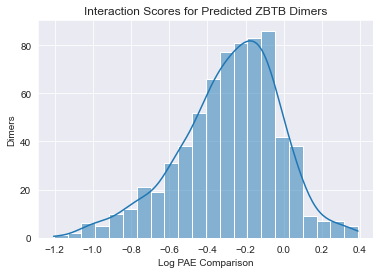

In [21]:
#In here, a histogram is created (from all combination and all values) in order to get a sense of distribution 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 

#interaction_scorings_df = pd.read_csv('interaction_scorings.csv')

#now we are getting the final_scores as list
final_score_list = interaction_scorings_df['log_PAE_comparison_homodimers'].to_numpy()

#to calculate the number of 'appropiate' bins Freedman–Diaconis rule is used
q25, q75 = np.percentile(final_score_list, [25, 75])
bin_width = 2 * (q75 - q25) * len(final_score_list) ** (-1/3)
bins = round((final_score_list.max() - final_score_list.min()) / bin_width)

print("Freedman–Diaconis number of bins:", bins)

sns.set_style('darkgrid') 

g=sns.histplot(final_score_list, bins=bins, kde=True) #histogram with kde
g.set_title('Interaction Scores for Predicted ZBTB Dimers')
g.set(ylabel = "Dimers", xlabel = "Log PAE Comparison")

plt.savefig("histogram_for_interaction_scores.jpg",dpi = 500)

In [ ]:
#Same as the previous cell, this time only ZBTB1 and ZBTB2 dimers are compared

g1 = sns.histplot(data=ZBTB1_2_df, x="Values", hue="Name",kde = True) #from the dataframe hue is picked (ZBTB1 or 2 dimers)
g1.set_title('Interaction Scores for Predicted ZBTB1 & ZBTB2 Dimers')
g1.set(ylabel = "Dimers", xlabel = "PAE Scores")

plt.savefig("histogram_for_interaction_scores_for_ZBTB1_2.jpg",dpi = 500)